In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns


df = pd.read_csv('../Dataset/all_var_int.csv')
df.describe()

/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_69650/1289112181.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Dataset/all_var_int.csv')


,FID_Key,state_code,district_code,block_code,objectid,stcode11,drought_frq,storm_freq,flood_freq,rural_pop,...,joint_acc_of_women_ratio,num_women_beneficiary_worker_with_acc_ratio,active_women_beneficiary_worker_with_acc_ratio,pmuy_ratio,shg_loan_per_shg,loan_per_shg,ratio_women_reg_workers_with_joint_acc,crp_vul_index,rainfed_farmland_ratio,gw_missing_flag
count,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5.815000e+03,...,5815.000000,5815.000000,5815.000000,5815.000000,5.815000e+03,5.815000e+03,5815.000000,5815.000000,5815.000000,5815.000000
mean,3744.730181,19.342218,362.509028,3424.578504,3459.751849,19.834910,3.081169,11.045572,22.271883,4.268809e+06,...,0.065415,0.814762,0.678983,0.247614,2.393990e+04,2.393990e+04,0.125774,0.110437,0.435247,0.004471
std,1998.031178,9.939108,195.339992,1951.511798,2106.574036,10.560126,2.103926,9.441698,14.123303,3.745933e+06,...,0.138342,0.167105,0.169635,0.132712,3.742710e+04,3.742710e+04,0.348387,0.077240,0.244583,0.066723
min,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1976.500000,9.000000,192.000000,1709.500000,1566.500000,9.000000,2.000000,3.000000,13.000000,1.569976e+06,...,0.003759,0.740155,0.584582,0.148857,4.916442e+03,4.916442e+03,0.009136,0.053663,0.232255,0.000000
50%,3670.000000,20.000000,356.000000,3408.000000,3289.000000,20.000000,3.000000,7.000000,21.000000,3.293788e+06,...,0.016412,0.865589,0.694471,0.239051,1.410389e+04,1.410389e+04,0.037012,0.097759,0.426119,0.000000
75%,5519.500000,27.000000,517.000000,5085.500000,5394.500000,27.000000,5.000000,20.000000,32.000000,6.076031e+06,...,0.062226,0.936591,0.801318,0.335610,3.248097e+04,3.248097e+04,0.119173,0.155059,0.617262,0.000000
max,7133.000000,38.000000,734.000000,7417.000000,7136.000000,39.000000,8.000000,38.000000,60.000000,3.173207e+07,...,2.311789,1.000000,1.000000,0.847415,1.705000e+06,1.705000e+06,18.176471,0.681558,1.000000,1.000000


In [2]:
normcols=['irrigation_ratio','vill_rwh_coverage','shg_per_1000_hh', 'loan_per_shg','avg_expenditure_per_hh', 'avg_mandays_per_hh','bc_per_10k_pop', 'branch_per_10k_pop','vill_road_coverage', 'road_pop_coverage','hh_non_farm_ratio','joint_acc_of_women_ratio', 'women_reg_workers_ratio','pmuy_ratio']
invertcols =['gw_stge_of_extraction']

drought_df = df[normcols+invertcols]

drought_df['gw_stge_of_extraction'] = df['gw_stge_of_extraction']/100
drought_df['gw_stge_of_extraction'] = 1/(1+df['gw_stge_of_extraction'])


/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_69650/4095068846.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drought_df['gw_stge_of_extraction'] = df['gw_stge_of_extraction']/100
/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_69650/4095068846.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drought_df['gw_stge_of_extraction'] = 1/(1+df['gw_stge_of_extraction'])


In [3]:
Rscaler = RobustScaler()
df_scaled = drought_df.copy()
cols = normcols+invertcols
df_scaled[cols] = Rscaler.fit_transform(drought_df[cols])

In [4]:
df_pca = df_scaled.drop(columns=['block_code', 'FID_Key','total_villages', 'geog_area'],errors='ignore')
df_pca.replace('', np.nan, inplace=True)
df_pca = df_pca.astype(float)

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_pca)

PCA()

In [5]:
pcaSummary_df = pd.DataFrame({
            '% variance': pca.explained_variance_ratio_,
            'Cumulative %': np.cumsum(pca.explained_variance_ratio_)
             })
# round(3) function rounds to 3 decimals
pcaSummary_df.round(3)



,% variance,Cumulative %
0,0.396,0.396
1,0.380,0.777
2,0.068,0.845
3,0.038,0.883
4,0.030,0.913
5,0.023,0.935
6,0.018,0.953
7,0.016,0.969
8,0.009,0.978
9,0.007,0.985


In [6]:
PCA_weights = pcaSummary_df['% variance']

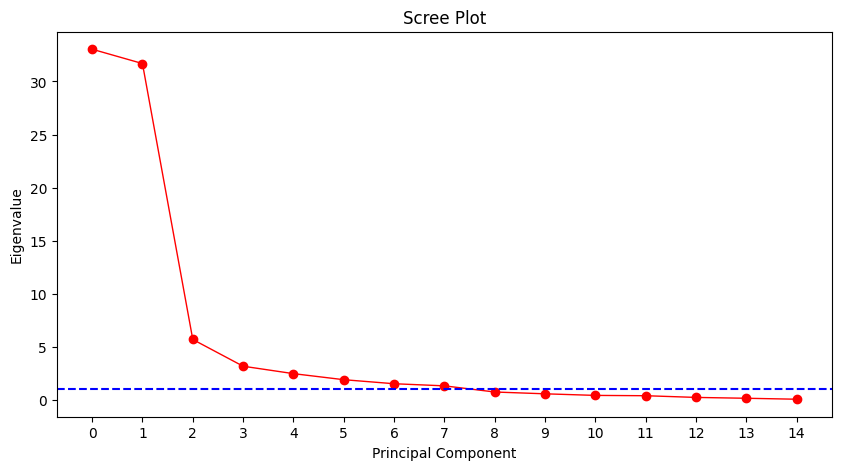

In [7]:
# scree plot of eigenvalues
# define the x values, i.e., components
#Eigenvalues are given by the PCA explained_variance_ method
eig = pca.explained_variance_.round(2) #explained variance method

xvals = np.arange(df_pca.shape[1]);
#figure size
plt.figure(figsize=(10,5))
#plot in red color
plt.plot(xvals, eig, 'ro-', linewidth=1)
#set ticks to every unit
plt.xticks(xvals)

#add labels...
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

#add a horizontal line in blue for latent root criterion
plt.axhline(y=1, color='b', linestyle='--')

#look for inflection point --> 2 is the major inflection point 
# philip said keep points before this --> that is 2 

In [8]:
# Fit PCA for all components (you already have this)
pca = PCA(n_components=8)
pca.fit(df_pca)

# Extract loadings (weights of variables for each PC)
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose to align variables with components
    columns=[f"PC{i+1}" for i in range(8)],  # Name components as PC1, PC2, ...
    index=df_pca.columns  # Original variable names
)

# Display loadings
print(loadings)

                               PC1       PC2       PC3       PC4       PC5  \
irrigation_ratio         -0.008656 -0.011917 -0.044143 -0.133346  0.035993   
vill_rwh_coverage         0.005548 -0.017415  0.009864  0.056481 -0.092377   
shg_per_1000_hh          -0.006131  0.015412 -0.008162  0.063235 -0.004579   
loan_per_shg              0.004094 -0.000386 -0.050797  0.033174 -0.003628   
avg_expenditure_per_hh   -0.000211  0.094619  0.114058  0.588024  0.279880   
avg_mandays_per_hh        0.003242  0.073747  0.111143  0.616049  0.251001   
bc_per_10k_pop            0.452281  0.039898  0.045767 -0.193910  0.704764   
branch_per_10k_pop        0.884110  0.103952 -0.007161  0.076576 -0.356658   
vill_road_coverage        0.012999 -0.023026 -0.037762  0.009360 -0.155528   
road_pop_coverage         0.014899 -0.025206 -0.034706  0.013713 -0.143173   
hh_non_farm_ratio         0.022871  0.003599 -0.043205  0.037656 -0.143213   
joint_acc_of_women_ratio -0.019637  0.041444  0.976310 -0.107591

In [9]:
# Add PCA scores to the DataFrame with renamed components
pca_scores = pca.transform(df_pca)

# Assign PCA scores to their respective components
for i, name in enumerate(loadings.columns):
    df_scaled[f"Drought_AC_{name}"] = pca_scores[:, i]

# Check the updated DataFrame
print(df_scaled.head())

   irrigation_ratio  vill_rwh_coverage  shg_per_1000_hh  loan_per_shg  \
0         -0.729075          -1.055005        -0.449671     -0.181864   
1         -0.700902          -0.142695        -0.330323     -0.470598   
2         -0.014606           0.524305         1.125197      0.552608   
3          0.736085           0.558532         2.777901     -0.329080   
4         -0.179410           0.519931         1.211723      0.409814   

   avg_expenditure_per_hh  avg_mandays_per_hh  bc_per_10k_pop  \
0               -0.784736           -0.659338        0.041973   
1               -0.510239           -0.336933       -0.916576   
2                0.032540           -0.123199        1.367188   
3                2.902413            3.026590       -0.338679   
4                1.168768            1.170187        0.339747   

   branch_per_10k_pop  vill_road_coverage  road_pop_coverage  ...  pmuy_ratio  \
0            1.039097            0.927667           0.744099  ...   -1.025197   
1       

In [10]:
# Multiply each PCA component score by its weight
df["Drought_AC_Index"] = (
    PCA_weights[0] * df_scaled["Drought_AC_PC1"] +
    PCA_weights[1] * df_scaled["Drought_AC_PC2"] +
    PCA_weights[2] * df_scaled["Drought_AC_PC3"] +
    PCA_weights[3] * df_scaled["Drought_AC_PC4"] +
    PCA_weights[4] * df_scaled["Drought_AC_PC5"] +
    PCA_weights[5] * df_scaled["Drought_AC_PC6"] +
    PCA_weights[6] * df_scaled["Drought_AC_PC7"] +
    PCA_weights[7] * df_scaled["Drought_AC_PC8"]
)

# Display the flood_exposure Index
print(df[["block_code", "Drought_AC_Index"]].head())

   block_code  Drought_AC_Index
0        6498         10.398450
1        6492          8.470469
2        4689          1.672019
3        4690         -0.535824
4        4692         -0.603930


In [11]:
df["Drought_AC_Index"].describe()

count    5.815000e+03
mean    -5.865185e-17
std      3.131784e+00
min     -1.744057e+00
25%     -9.422722e-01
50%     -5.982860e-01
75%     -9.207769e-02
max      1.203144e+02
Name: Drought_AC_Index, dtype: float64